# Modelling treatment

In [2]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import math
from scipy.integrate import odeint

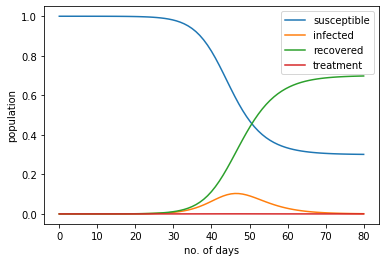

In [3]:
betta=0.6 # Daily infection rate
nu=0.2
pop=300000
t=5
h=0.15 
def du_dt(u,t):
    lamda=betta*(u[1]+u[3])/pop
    return([-u[0]*(lamda),u[0]*lamda - nu*u[1] - h*u[1],u[1]*nu + t*u[3],h*u[1] - t*u[3] ])
x=np.linspace(0,80,79)
y0=[pop-1,1,0,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected")
plt.plot(x,y[:,2]/pop,label="recovered")
plt.plot(x,y[:,3]/pop,label="treatment")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

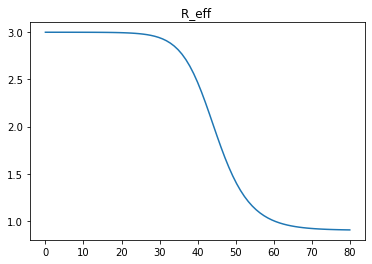

In [4]:
r0=betta/nu
plt.plot(x,r0*y[:,0]/pop)
plt.title("R_eff ")
plt.show()

In [5]:
import pandas as pd
df=pd.DataFrame(y[:,3])
df.describe()

,0
count,79.000000
mean,23.922163
std,32.315523
min,0.000000
25%,0.876065
50%,5.944402
75%,37.839800
max,101.019917
